In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
data = pd.read_csv('./data/dataset_sliced.csv')

S1 = data.loc[data['Subject'] == 'S1']
S1['Gender'].replace(' f', 0, inplace=True)
S1['Gender'].replace(' m', 1, inplace=True)

remove = ["Subject", "Activity"]
features = [column for column in list(data.columns) if column not in remove]
data['Gender'].replace(' f', 0, inplace=True)
data['Gender'].replace(' m', 1, inplace=True)
data

c:\Users\Conler\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,chest_ACC_x,chest_ACC_y,chest_ACC_z,Resp,ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,label,Subject
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,1,34,182.0,3,6,0,0,49.611369,S1
1,0.8520,-0.0666,-0.3826,2.915955,0.159714,-0.750000,-0.078125,0.671875,6.34,32.15,78.0,1,34,182.0,3,6,1,0,50.323992,S1
2,0.8300,-0.0102,-0.3502,-1.623535,0.014603,-1.046875,-0.046875,0.843750,7.70,32.15,78.0,1,34,182.0,3,6,0,0,52.708336,S1
3,0.7630,0.0552,-0.6070,0.416565,-0.307617,-0.859375,-0.390625,0.390625,-120.35,32.15,78.0,1,34,182.0,3,6,0,0,55.640794,S1
4,0.8894,-0.0520,-0.2520,0.198364,0.604111,-1.015625,-0.078125,0.140625,-7.06,32.15,78.0,1,34,182.0,3,6,0,0,57.658406,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,0.7874,-0.0146,-0.5400,1.446533,0.486740,-0.984375,0.156250,0.234375,7.30,34.03,79.0,1,28,183.0,2,5,1,2,75.475622,S15
64693,0.8936,-0.1080,0.4138,10.545349,-0.124466,-0.562500,-0.031250,0.718750,117.29,34.00,79.0,1,28,183.0,2,5,0,2,77.524511,S15
64694,0.9012,0.0262,-0.1576,-7.260132,-0.138702,-0.375000,-0.203125,0.875000,39.55,34.00,79.0,1,28,183.0,2,5,1,2,78.714945,S15
64695,0.8966,0.0104,-0.2252,1.187134,-0.288849,-1.421875,-0.046875,0.171875,-21.28,34.00,79.0,1,28,183.0,2,5,0,2,80.413954,S15


In [3]:
data.drop(columns = ['WEIGHT','Gender', 'AGE', 'HEIGHT', 'SKIN', 'SPORT', 'Activity','Subject' ], inplace = True)
S1.drop(columns = ['WEIGHT','Gender', 'AGE', 'HEIGHT', 'SKIN', 'SPORT', 'Activity','Subject' ], inplace = True)

c:\Users\Conler\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [4]:
y = data['label']
X = data.drop(columns = ['label'],inplace = False)
S1_y = S1['label']
S1_X = S1.drop(columns = ['label'],inplace = False)
S1_y.astype(np.float32)
S1_X.astype(np.float32)

,chest_ACC_x,chest_ACC_y,chest_ACC_z,Resp,ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,Rpeaks
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.280000,32.130001,0.0
1,0.8520,-0.0666,-0.3826,2.915955,0.159714,-0.750000,-0.078125,0.671875,6.340000,32.150002,1.0
2,0.8300,-0.0102,-0.3502,-1.623535,0.014603,-1.046875,-0.046875,0.843750,7.700000,32.150002,0.0
3,0.7630,0.0552,-0.6070,0.416565,-0.307617,-0.859375,-0.390625,0.390625,-120.349998,32.150002,0.0
4,0.8894,-0.0520,-0.2520,0.198364,0.604111,-1.015625,-0.078125,0.140625,-7.060000,32.150002,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4598,0.7214,-0.0738,-0.6110,6.085205,-0.090775,-0.531250,0.000000,0.859375,-0.860000,34.410000,1.0
4599,0.7214,-0.0808,-0.6274,-3.590393,-0.183243,-0.531250,-0.046875,0.875000,102.519997,34.389999,0.0
4600,0.8490,-0.0898,-0.2904,7.107544,0.233826,-0.718750,0.687500,0.359375,352.519989,34.410000,1.0
4601,0.8376,-0.1526,-0.0126,-0.604248,-0.199493,-0.515625,1.156250,0.453125,-155.179993,34.389999,0.0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,  y_val = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

y.astype(np.float32)
X.astype(np.float32)

(38818, 11) (38818,) (25879, 11) (25879,)


,chest_ACC_x,chest_ACC_y,chest_ACC_z,Resp,ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,Rpeaks
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.280000,32.130001,0.0
1,0.8520,-0.0666,-0.3826,2.915955,0.159714,-0.750000,-0.078125,0.671875,6.340000,32.150002,1.0
2,0.8300,-0.0102,-0.3502,-1.623535,0.014603,-1.046875,-0.046875,0.843750,7.700000,32.150002,0.0
3,0.7630,0.0552,-0.6070,0.416565,-0.307617,-0.859375,-0.390625,0.390625,-120.349998,32.150002,0.0
4,0.8894,-0.0520,-0.2520,0.198364,0.604111,-1.015625,-0.078125,0.140625,-7.060000,32.150002,0.0
...,...,...,...,...,...,...,...,...,...,...,...
64692,0.7874,-0.0146,-0.5400,1.446533,0.486740,-0.984375,0.156250,0.234375,7.300000,34.029999,1.0
64693,0.8936,-0.1080,0.4138,10.545349,-0.124466,-0.562500,-0.031250,0.718750,117.290001,34.000000,0.0
64694,0.9012,0.0262,-0.1576,-7.260132,-0.138702,-0.375000,-0.203125,0.875000,39.549999,34.000000,1.0
64695,0.8966,0.0104,-0.2252,1.187134,-0.288849,-1.421875,-0.046875,0.171875,-21.280001,34.000000,0.0


In [6]:
X_train = np.expand_dims(X_train, -1)
X_val = np.expand_dims(X_val, -1)
S1_X = np.expand_dims(S1_X, -1)

In [7]:
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
import matplotlib.pyplot as plt

model = Sequential() 
model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1]))) 
model.add(Dropout(0.5)) 
model.add( LSTM(20,return_sequences=False)) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.compile(loss='mae', optimizer='adam')

In [8]:
model.fit(X_train, y_train, epochs=3000, batch_size=128, verbose=1)

Epoch 1/3000
304/304 [==============================] - 4s 7ms/step - loss: 80.7538
Epoch 2/3000
304/304 [==============================] - 2s 7ms/step - loss: 73.3132
Epoch 3/3000
304/304 [==============================] - 2s 7ms/step - loss: 66.7965
Epoch 4/3000
304/304 [==============================] - 2s 8ms/step - loss: 60.3257
Epoch 5/3000
304/304 [==============================] - 2s 8ms/step - loss: 53.9602
Epoch 6/3000
304/304 [==============================] - 2s 7ms/step - loss: 47.7312
Epoch 7/3000
304/304 [==============================] - 2s 8ms/step - loss: 41.7431
Epoch 8/3000
304/304 [==============================] - 2s 7ms/step - loss: 36.4553
Epoch 9/3000
304/304 [==============================] - 2s 8ms/step - loss: 32.0860
Epoch 10/3000
304/304 [==============================] - 2s 7ms/step - loss: 28.8536
Epoch 11/3000
304/304 [==============================] - 2s 7ms/step - loss: 26.5803
Epoch 12/3000
304/304 [==============================] - 2s 7ms/step - los

In [ ]:
model.evaluate(X_val,y_val)

In [ ]:
from sklearn.metrics import mean_absolute_error

S1_pred_LR = model.predict(S1_X)
mean_absolute_error(S1_pred_LR, S1_y)

7.838509986155902

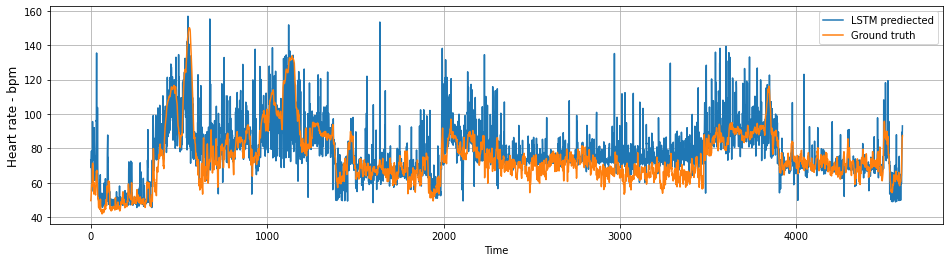

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( S1_pred_LR, label = 'LSTM prediected')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()
